# Spaceship Titanic
### Predict which passengers are transported to an alternate dimension

#### File and Data Field Descriptions
#### train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
#### test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.




* sample_submission.csv - A submission file in the correct format.
* PassengerId - Id for each passenger in the test set.
* Transported - The target. For each passenger, predict either True or False.

### Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize']=[15,8]

### Read the train data 

In [3]:
data = pd.read_csv('train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df = data.copy()
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Basic analysis:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.shape

(8693, 14)

In [7]:
col=df.columns.to_list()
col

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [8]:
#droping unwanted columns
df1=df.drop(['Name','Cabin'],axis=1)
df1

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [9]:
num = ['PassengerId',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [10]:
cat = ['HomePlanet',
 'CryoSleep', 'VIP',
 'Destination',
 'Transported']

### Cleaning the data:

In [11]:
#checking the percentage of null values:
(df1.isna().sum() / len(df1)) * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
dtype: float64

In [12]:
df1[num].skew()

PassengerId      0.002020
Age              0.419097
RoomService      6.333014
FoodCourt        7.102228
ShoppingMall    12.627562
Spa              7.636020
VRDeck           7.819732
dtype: float64

In [13]:
df1[num].mean()

PassengerId            inf
Age              28.827930
RoomService     224.687617
FoodCourt       458.077203
ShoppingMall    173.729169
Spa             311.138778
VRDeck          304.854791
dtype: float64

In [14]:
df1[num].median()

PassengerId     463001.0
Age                 27.0
RoomService          0.0
FoodCourt            0.0
ShoppingMall         0.0
Spa                  0.0
VRDeck               0.0
dtype: float64

In [15]:
#filling null values with mean in numerical columns

df1['Age']=df1['Age'].fillna(df1['Age'].mean())
df1['RoomService']=df1['RoomService'].fillna(df1['RoomService'].mean())
df1['FoodCourt']=df1['FoodCourt'].fillna(df1['FoodCourt'].mean())
df1['ShoppingMall']=df1['ShoppingMall'].fillna(df1['ShoppingMall'].mean())
df1['Spa']=df1['Spa'].fillna(df1['Spa'].mean())
df1['VRDeck']=df1['VRDeck'].fillna(df1['VRDeck'].mean())

In [16]:
#filling null values with mode in categorical columns

df1['HomePlanet']=df1['HomePlanet'].fillna(df1['HomePlanet'].mode()[0])
df1['CryoSleep']=df1['CryoSleep'].fillna(df1['CryoSleep'].mode()[0])
df1['Destination']=df1['Destination'].fillna(df1['Destination'].mode()[0])
df1['VIP']=df1['VIP'].fillna(df1['VIP'].mode()[0])

In [17]:
#checking the percentage of null values:

(df1.isna().sum() / len(df1)) * 100

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Transported     0.0
dtype: float64

### Amnalysing the target column 

In [18]:
df1.Transported

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

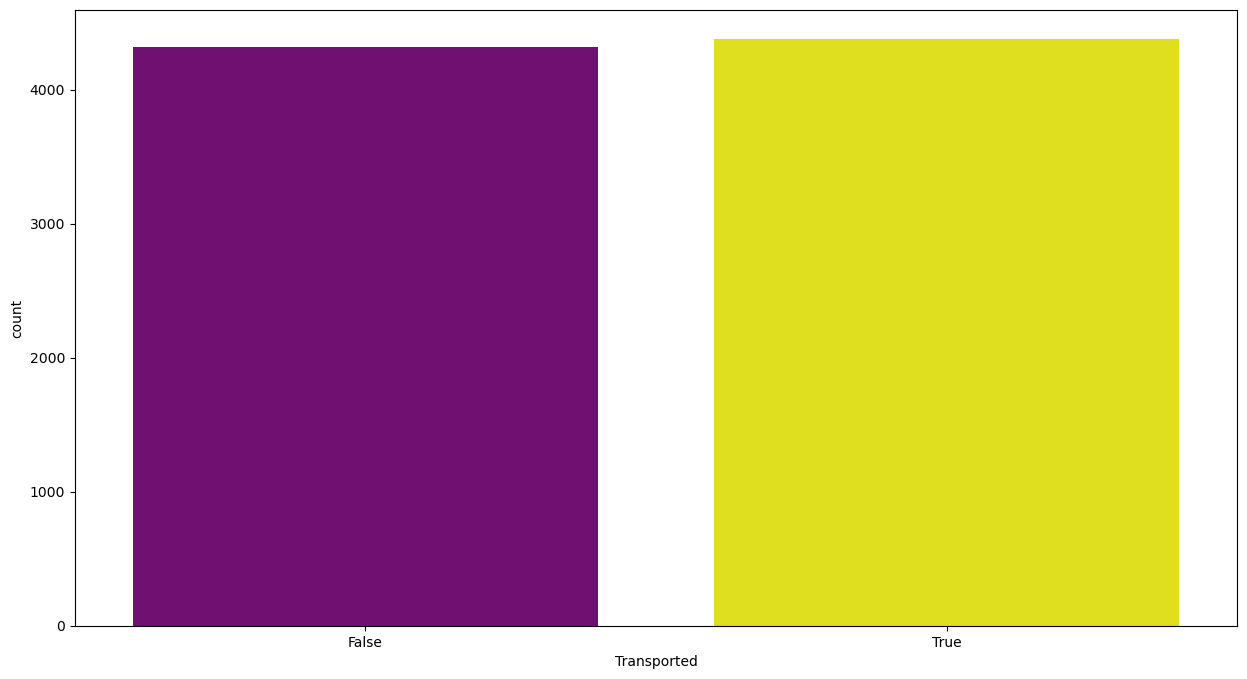

In [19]:
sns.countplot(df1.Transported,palette=['purple','yellow'])
plt.show()

### Feature Engineering:

In [20]:
df1['Not Transported'] = 1 - df1['Transported']
df1['Not Transported']

0       1
1       0
2       1
3       1
4       0
       ..
8688    1
8689    1
8690    0
8691    1
8692    0
Name: Not Transported, Length: 8693, dtype: int32

### Analysing the Independent columns:

##### Numerical columns

In [21]:
df1[num]

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0


In [22]:
df1[num].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [23]:
df1['Age'].unique()

array([39.        , 24.        , 58.        , 33.        , 16.        ,
       44.        , 26.        , 28.        , 35.        , 14.        ,
       34.        , 45.        , 32.        , 48.        , 31.        ,
       27.        ,  0.        ,  1.        , 49.        , 29.        ,
       10.        ,  7.        , 21.        , 62.        , 15.        ,
       43.        , 47.        ,  2.        , 20.        , 23.        ,
       30.        , 17.        , 55.        ,  4.        , 19.        ,
       56.        , 28.82793047, 25.        , 38.        , 36.        ,
       22.        , 18.        , 42.        , 37.        , 13.        ,
        8.        , 40.        ,  3.        , 54.        ,  9.        ,
        6.        , 64.        , 67.        , 61.        , 50.        ,
       41.        , 57.        , 11.        , 52.        , 51.        ,
       46.        , 60.        , 63.        , 59.        ,  5.        ,
       79.        , 68.        , 74.        , 12.        , 53.  

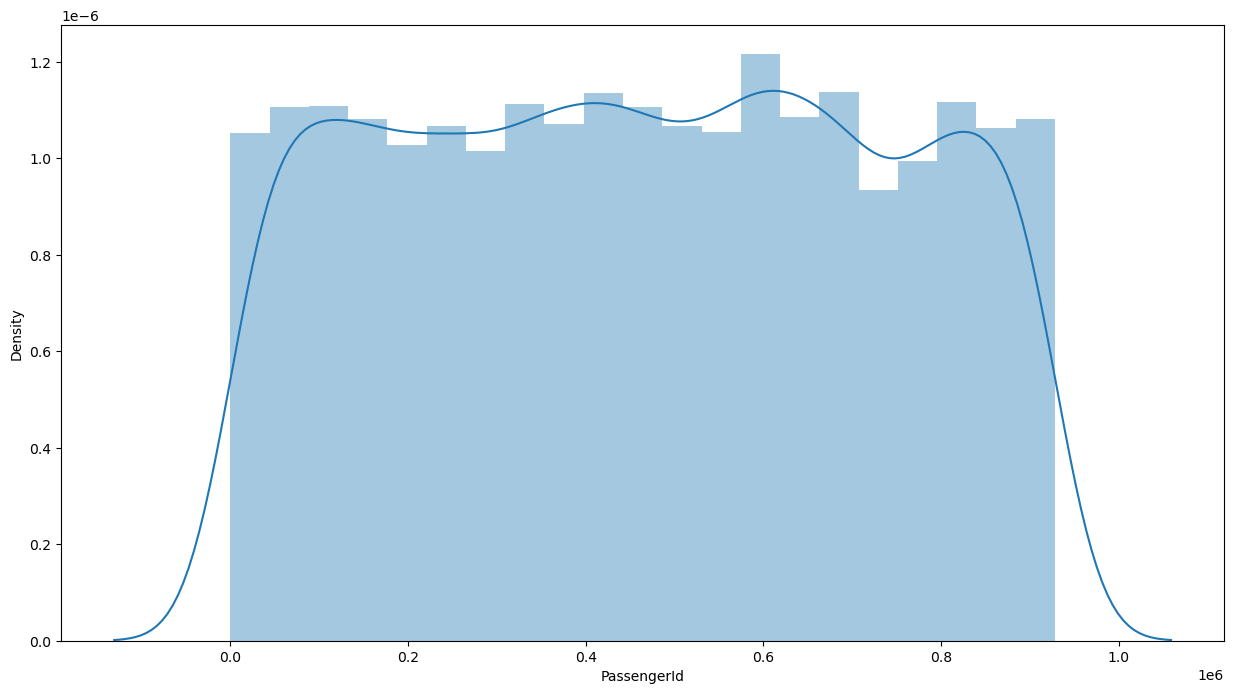

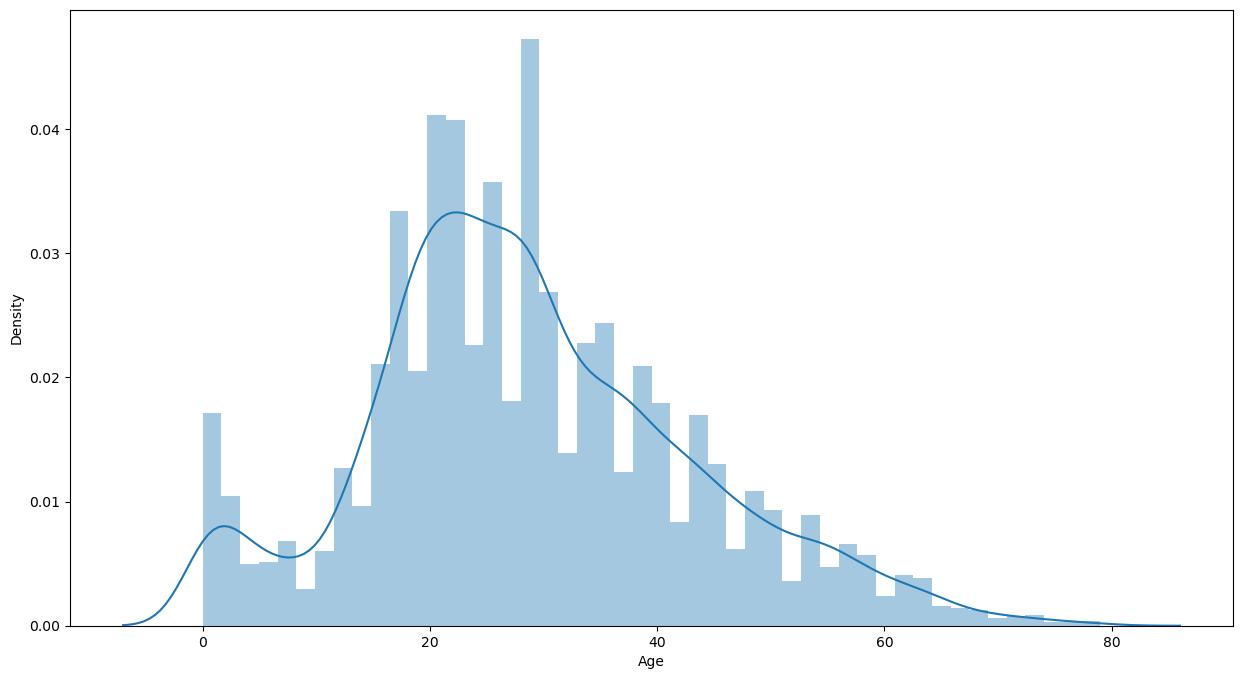

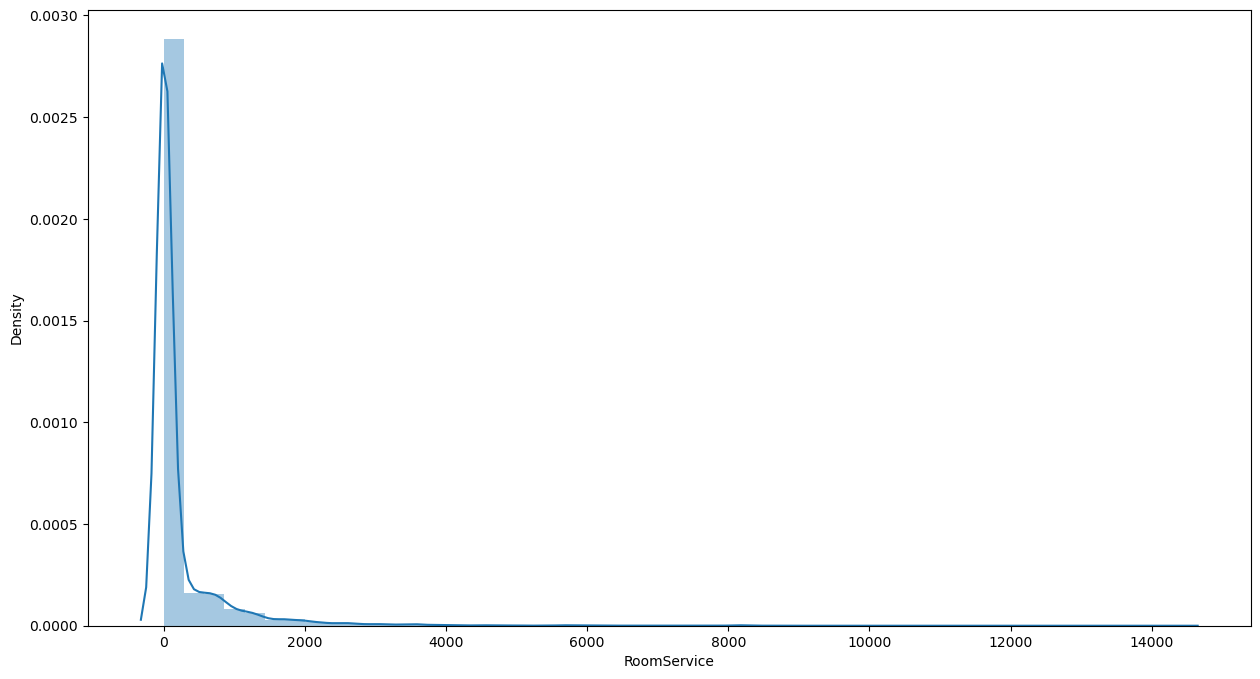

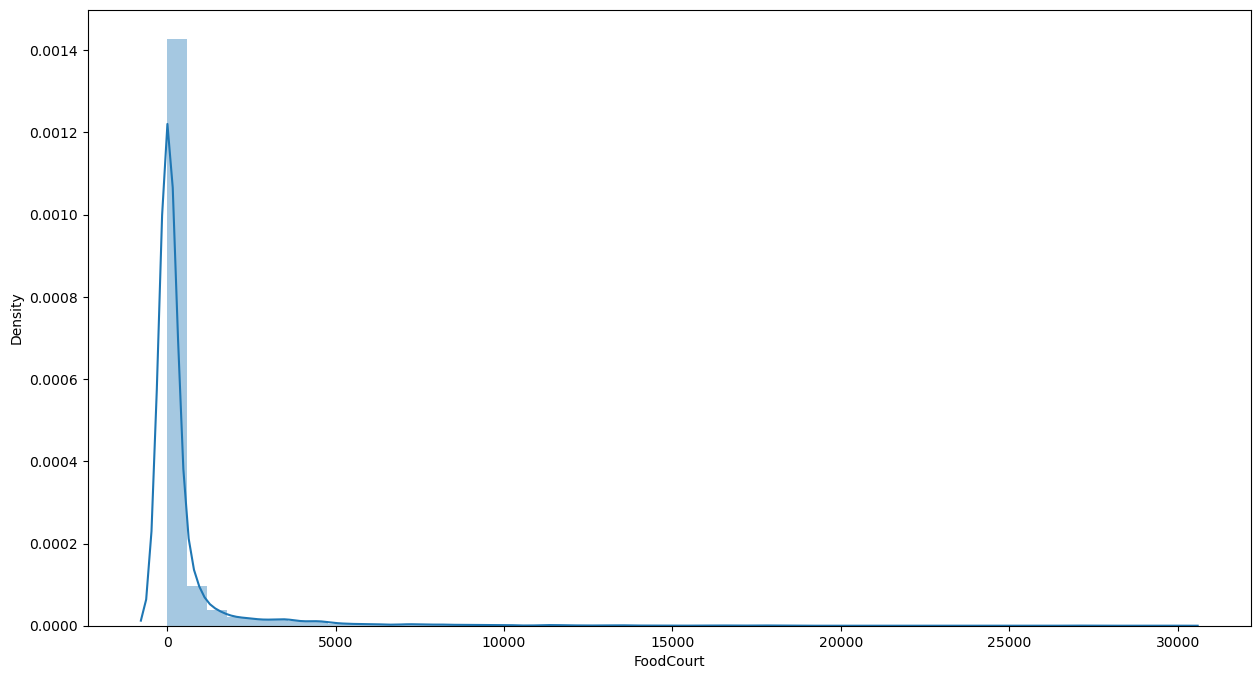

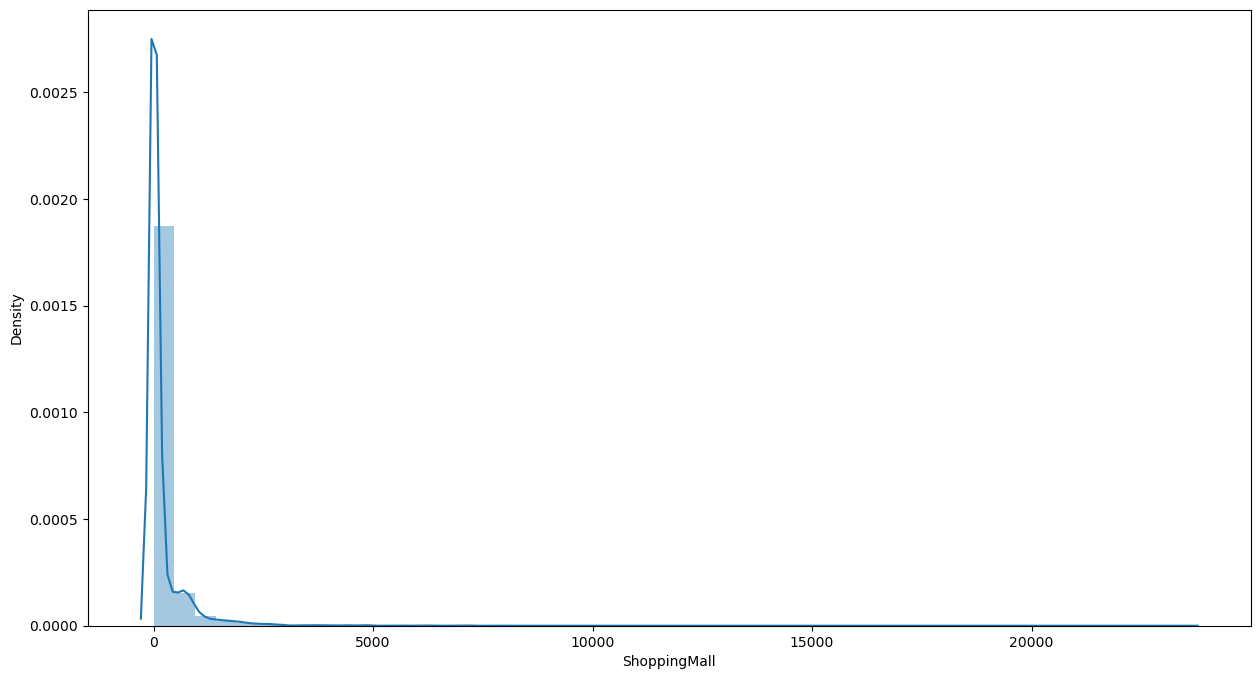

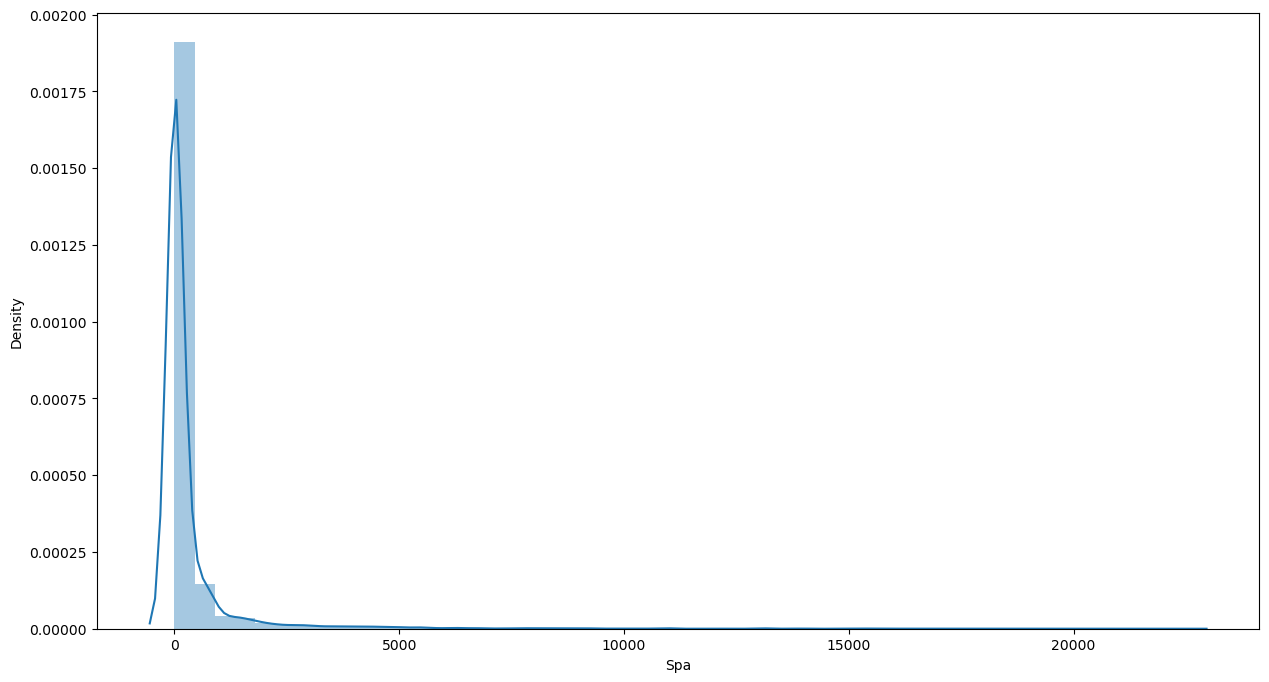

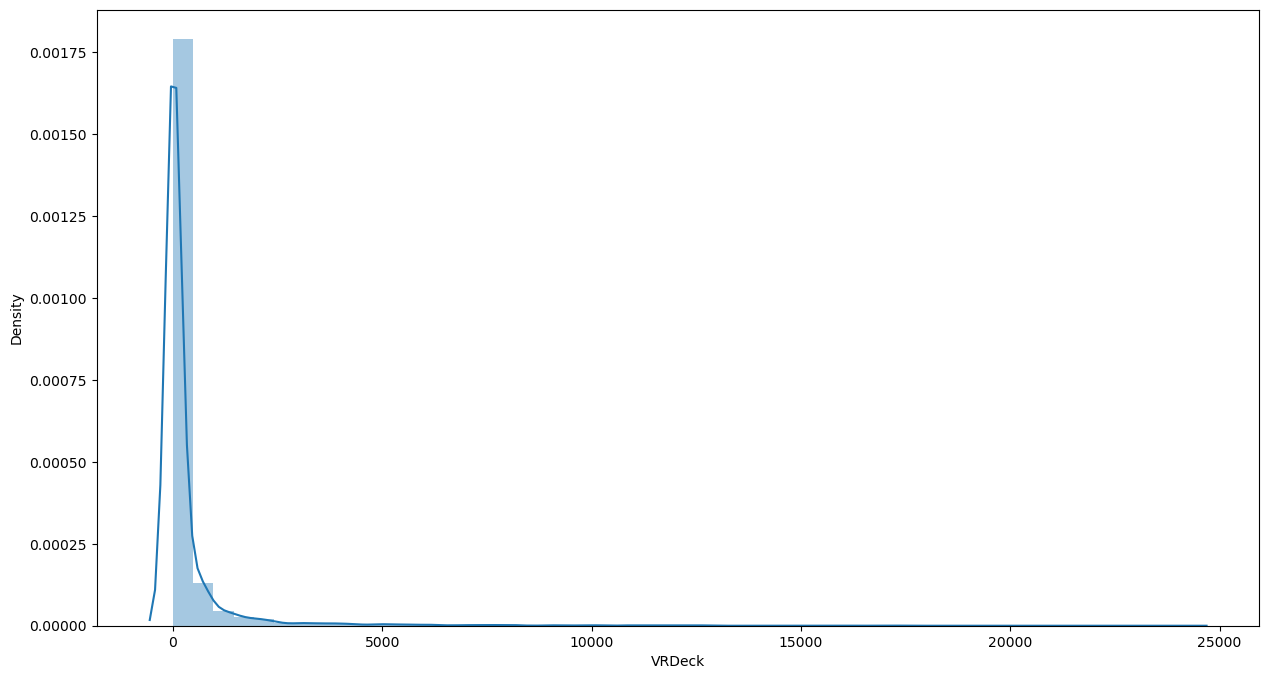

In [24]:
for i in num:
    sns.distplot(df1[i])
    plt.show()

##### This shows that many passengers in the Spaceship Titanic are not using 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck' since the columns indicates the bills

##### Categorical columns

In [25]:
df1[cat]

,HomePlanet,CryoSleep,VIP,Destination,Transported
0,Europa,False,False,TRAPPIST-1e,False
1,Earth,False,False,TRAPPIST-1e,True
2,Europa,False,True,TRAPPIST-1e,False
3,Europa,False,False,TRAPPIST-1e,False
4,Earth,False,False,TRAPPIST-1e,True
...,...,...,...,...,...
8688,Europa,False,True,55 Cancri e,False
8689,Earth,True,False,PSO J318.5-22,False
8690,Earth,False,False,TRAPPIST-1e,True
8691,Europa,False,False,55 Cancri e,False


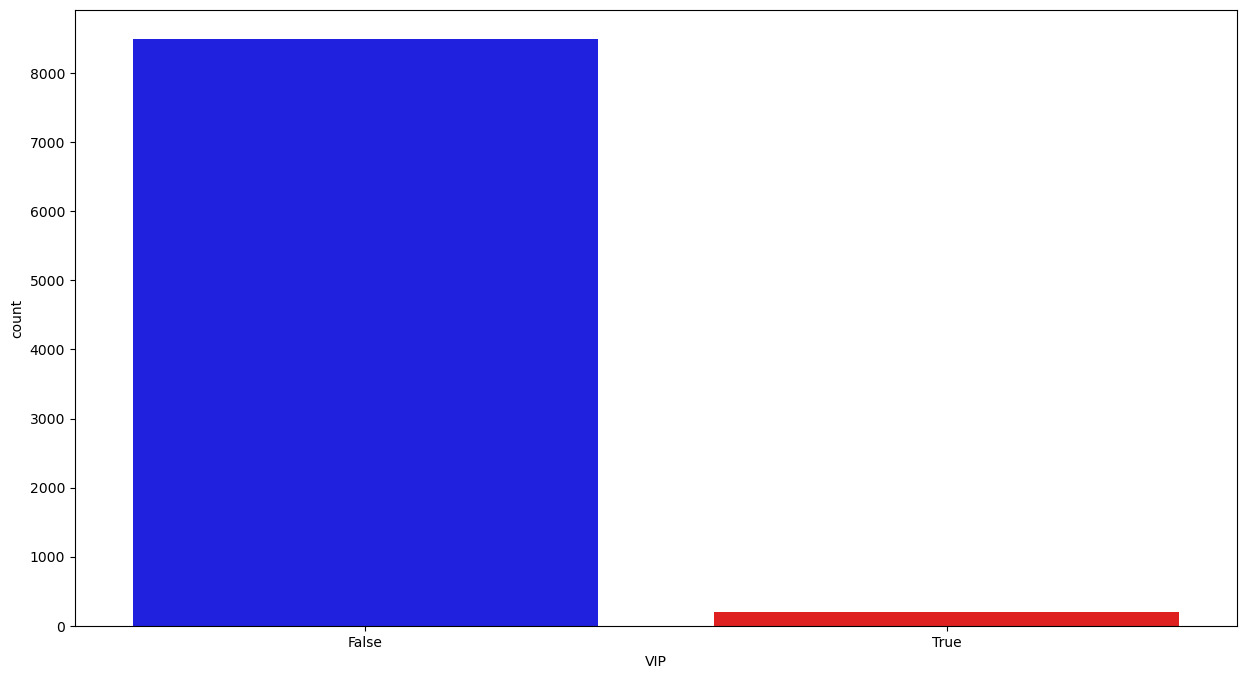

In [26]:
#analysing VIP column:


sns.countplot(df1['VIP'],palette=['blue','red'])
plt.show()

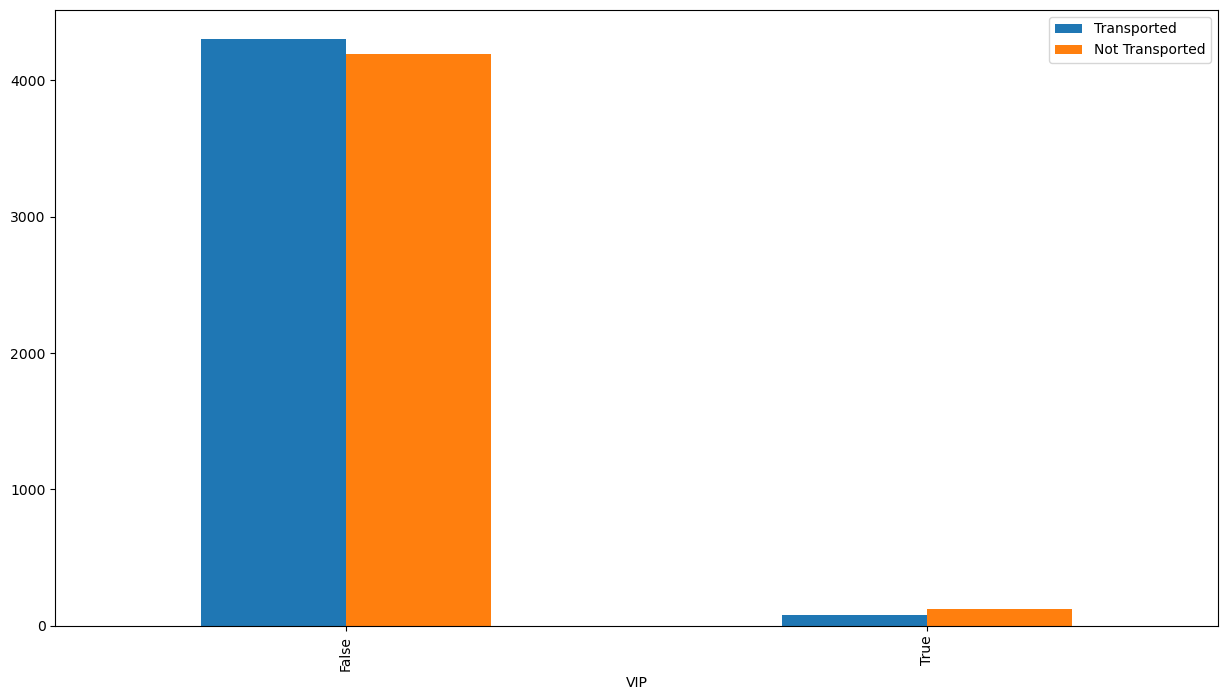

In [27]:
df1.groupby(by = 'VIP')[['Transported','Not Transported']].sum().plot(kind = 'bar')
plt.show()

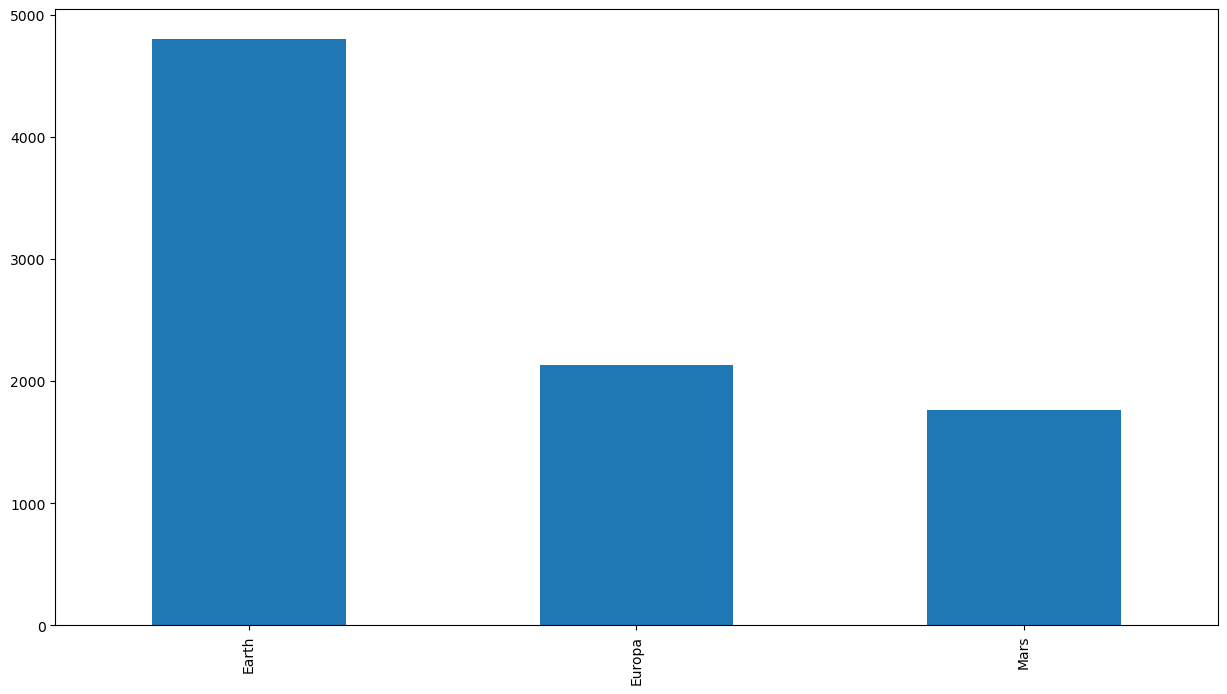

In [28]:
df1.HomePlanet.value_counts().plot(kind='bar')
plt.show()

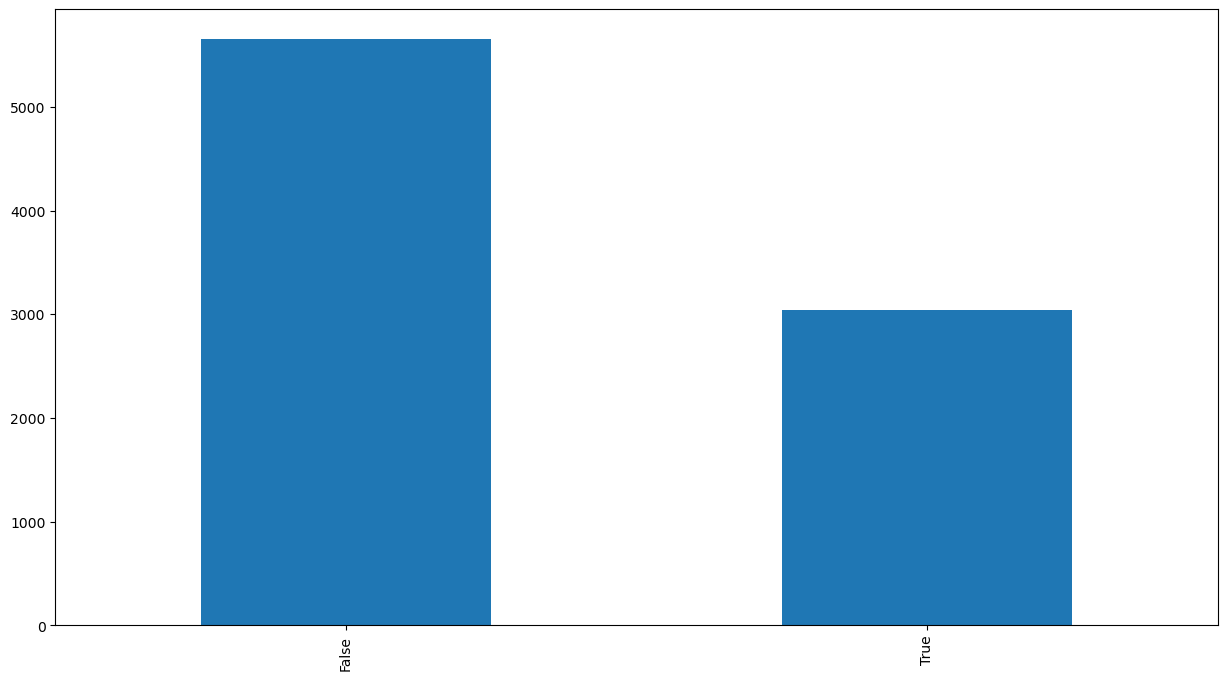

In [29]:
df1.CryoSleep.value_counts().plot(kind='bar')
plt.show()

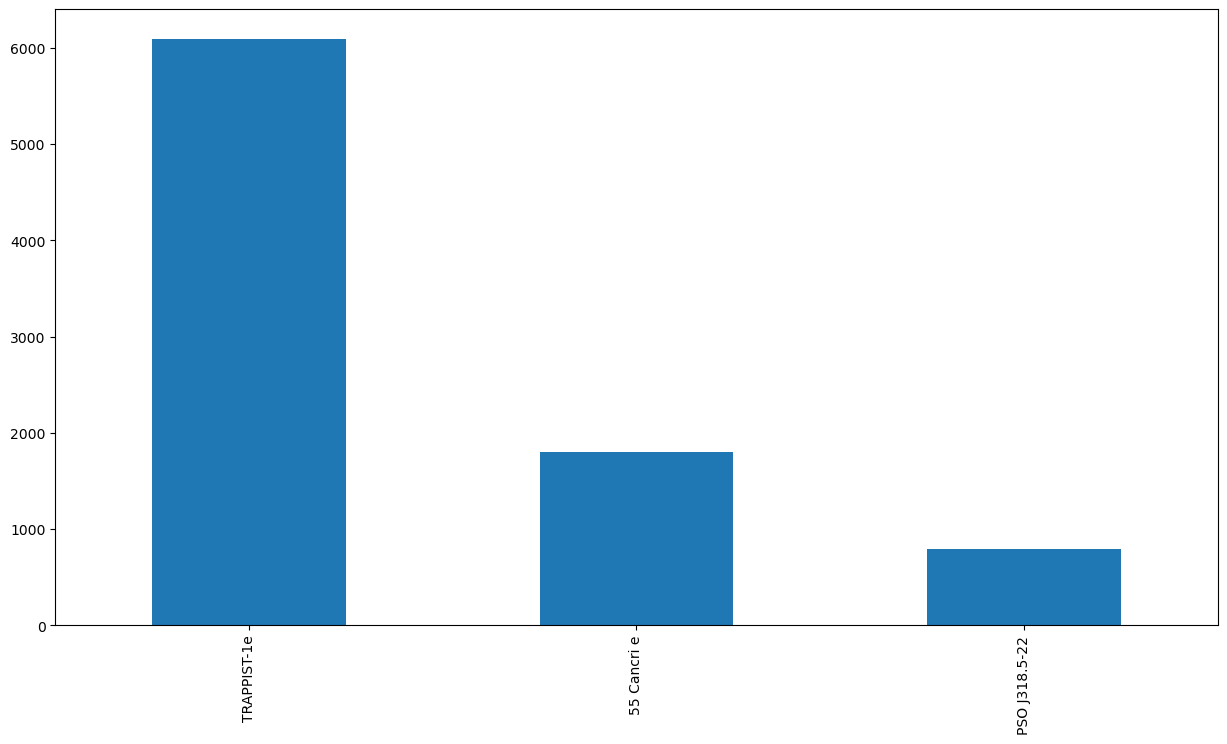

In [30]:
df1.Destination.value_counts().plot(kind='bar')
plt.show()

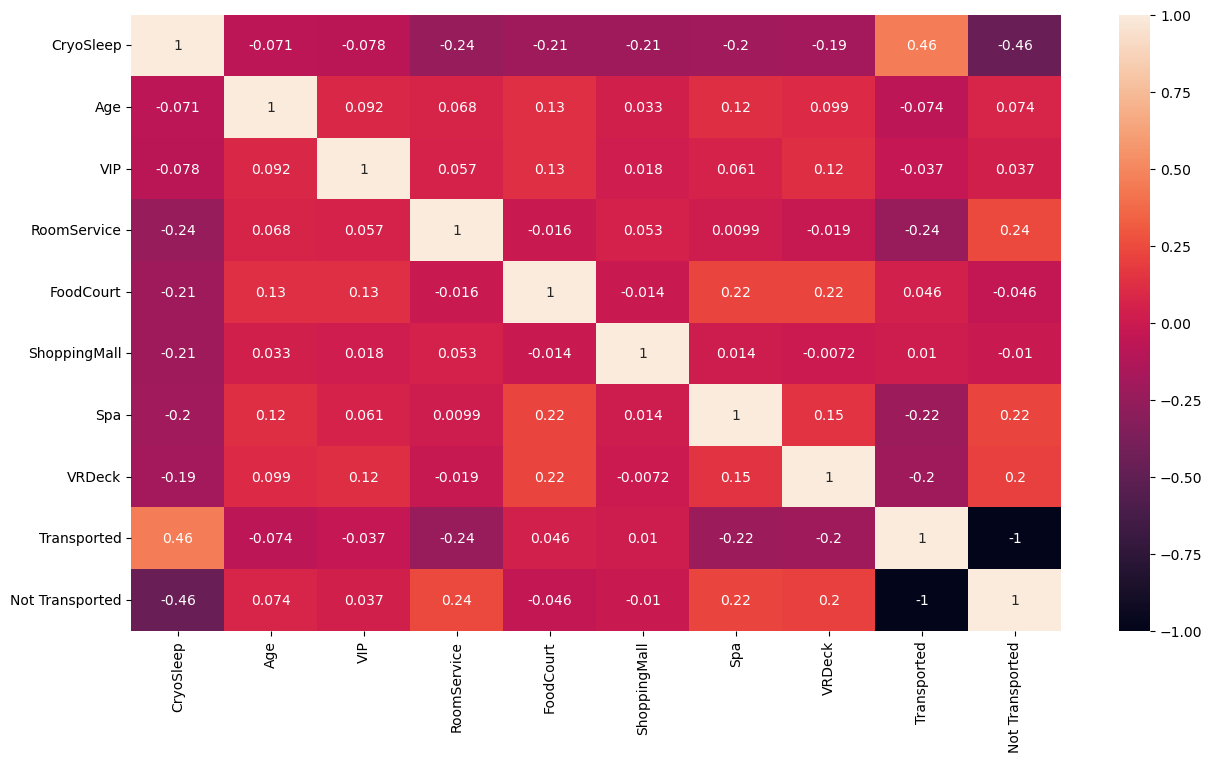

In [31]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

### Encoding:

In [32]:
#converting categorical feature into numerical feature
df1.HomePlanet=df1.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})

In [33]:
df1["CryoSleep"].replace(False,0,inplace=True)
df1["CryoSleep"].replace(True,1,inplace=True)
df1["VIP"].replace(False,0,inplace=True)
df1["VIP"].replace(True,1,inplace=True)
df1["Transported"].replace(False,0,inplace=True)
df1["Transported"].replace(True,1,inplace=True)

In [34]:
df1.Destination=df1.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})

In [35]:
df1

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Not Transported
0,0001_01,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1
1,0002_01,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0
2,0003_01,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,0003_02,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0004_01,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,1
8689,9278_01,1,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1
8690,9279_01,1,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0
8691,9280_01,0,0,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1


In [36]:
#droping Not transforted:

df1.drop(['PassengerId','Not Transported'],axis=1,inplace=True)

In [37]:
df1

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,1,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,1,0,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,0,0,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


### Train Test Split:

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x = df1.drop('Transported',axis=1)
y = df1['Transported']

In [40]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)

In [41]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(6085, 10)
(2608, 10)
(6085,)
(2608,)


### Scaling:

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
xtrain_sc = xtrain.copy()
xtest_sc = xtest.copy()

In [44]:
num

['PassengerId',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [45]:
scale = df1[['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']]
scale

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [46]:
sc = scale.columns.to_list()
sc

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [47]:
s = StandardScaler()

xtrain_sc[sc] = s.fit_transform(xtrain[sc])
xtest_sc[sc] = s.transform(xtest[sc])


In [48]:
xtrain_sc

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4825,1,1,0,-0.755593,0,-0.331768,-0.292372,-0.275338,-0.274666,-0.269198
6702,1,1,0,0.773665,0,-0.331768,-0.292372,-0.275338,-0.274666,0.005136
2093,0,1,2,-0.269011,0,-0.331768,-0.292372,-0.275338,-0.274666,-0.269198
3207,0,0,0,-0.547058,0,-0.331768,1.540057,-0.275338,0.096851,0.232937
175,1,0,1,1.607805,0,-0.331768,-0.292372,-0.275338,-0.274666,-0.269198
...,...,...,...,...,...,...,...,...,...,...
350,1,0,2,-2.006804,0,-0.331768,-0.292372,-0.275338,-0.274666,-0.269198
79,0,1,0,0.773665,0,-0.331768,-0.292372,-0.275338,-0.274666,-0.269198
8039,1,1,1,-0.755593,0,-0.331768,-0.292372,-0.275338,-0.274666,-0.269198
6936,1,0,2,-0.408034,0,-0.327329,-0.292372,-0.272160,-0.219926,0.301328


In [49]:
xtest_sc

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
6913,1,0,0,-0.129988,0,-0.331768,-0.251637,-0.262627,-0.158904,2.394460
7066,1,0,0,2.024875,0,1.689500,-0.126199,-0.275338,-0.274666,0.010666
8001,2,1,0,-0.755593,0,-0.331768,-0.292372,-0.275338,-0.274666,-0.269198
1200,1,1,0,-1.033640,0,-0.331768,-0.292372,-0.275338,-0.274666,-0.269198
4442,1,0,1,-0.338523,0,-0.103895,-0.287846,0.107592,-0.083523,0.138449
...,...,...,...,...,...,...,...,...,...,...
7869,0,0,0,0.217571,0,-0.331768,-0.283966,-0.275338,1.652916,0.017865
6271,1,1,0,0.009036,0,-0.331768,-0.292372,-0.275338,-0.274666,-0.269198
4002,2,0,2,1.885852,0,0.277868,0.025749,-0.261038,-0.169672,-0.239502
4621,2,0,0,-0.408034,0,-0.040268,-0.243231,8.678228,-0.268384,-0.269198


## Model Building:

### Metrices:

In [50]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score,classification_report,cohen_kappa_score,roc_auc_score,roc_curve

In [51]:
def metrices(name,key,arg):
    print('Name of the model :',name)
    print('Precision score :',precision_score(key,arg))    
    print('Recall score :',recall_score(key,arg)) 
    print('Accuracy :', accuracy_score(key,arg))
    print('F1-Score :', accuracy_score(key,arg))
    print('Weighted F1-Score', f1_score(key,arg,average='weighted'))
    print('Classification report','\n',classification_report(key,arg))
    print('Cohen Kappa Score :', cohen_kappa_score(key,arg))

### 1.Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression(random_state=100)
lr.fit(xtrain_sc,ytrain)
lr_pred = lr.predict(xtest_sc)
lr_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [54]:
metrices('Logistic Regression',ytest,lr_pred)

Name of the model : Logistic Regression
Precision score : 0.75932699341624
Recall score : 0.8225039619651348
Accuracy : 0.7879601226993865
F1-Score : 0.7879601226993865
Weighted F1-Score 0.7878913780148719
Classification report 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1346
           1       0.76      0.82      0.79      1262

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

Cohen Kappa Score : 0.576579126303094


In [55]:
a1 = round(accuracy_score(ytest,lr_pred),3)*100
a1

78.8

### 2.Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(xtrain_sc,ytrain)
dt_pred = dt.predict(xtest_sc)
dt_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [58]:
metrices('Decision Tree Classifier',ytest,dt_pred)

Name of the model : Decision Tree Classifier
Precision score : 0.7192592592592593
Recall score : 0.7694136291600634
Accuracy : 0.7430981595092024
F1-Score : 0.7430981595092024
Weighted F1-Score 0.743084864283126
Classification report 
               precision    recall  f1-score   support

           0       0.77      0.72      0.74      1346
           1       0.72      0.77      0.74      1262

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608

Cohen Kappa Score : 0.48677943640195775


In [59]:
a2 = round(accuracy_score(ytest,dt_pred),3)*100
a2

74.3

### 3.Random Forest Classifier:

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(random_state=100)
rf.fit(xtrain_sc,ytrain)
rf_pred = rf.predict(xtest_sc)
rf_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [62]:
metrices('Random Forest classifier',ytest,rf_pred)

Name of the model : Random Forest classifier
Precision score : 0.7676609105180534
Recall score : 0.7749603803486529
Accuracy : 0.7776073619631901
F1-Score : 0.7776073619631901
Weighted F1-Score 0.7776356335448418
Classification report 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1346
           1       0.77      0.77      0.77      1262

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608

Cohen Kappa Score : 0.5548848957953243


In [63]:
a3 = round(accuracy_score(ytest,rf_pred),3)*100
a3

77.8

### 4.Naive - Bayes Classifier:

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
nb = GaussianNB()
nb.fit(xtrain_sc,ytrain)
nb_pred = nb.predict(xtest_sc)
nb_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [66]:
metrices('Naive Bayes classifier',ytest,nb_pred)

Name of the model : Naive Bayes classifier
Precision score : 0.6183368869936035
Recall score : 0.919175911251981
Accuracy : 0.6863496932515337
F1-Score : 0.6863496932515337
Weighted F1-Score 0.6706969134818493
Classification report 
               precision    recall  f1-score   support

           0       0.86      0.47      0.61      1346
           1       0.62      0.92      0.74      1262

    accuracy                           0.69      2608
   macro avg       0.74      0.69      0.67      2608
weighted avg       0.74      0.69      0.67      2608

Cohen Kappa Score : 0.38143861195518547


In [67]:
a4 = round(accuracy_score(ytest,nb_pred),3)*100
a4

68.60000000000001

### 5.Support Vector Machine(classifier):

In [68]:
from sklearn.svm import SVC

In [69]:
svc = SVC(random_state=100)
svc.fit(xtrain_sc,ytrain)
svc_pred = svc.predict(xtest_sc)
svc_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [70]:
metrices('Support Vector classifier',ytest,svc_pred)

Name of the model : Support Vector classifier
Precision score : 0.7559912854030502
Recall score : 0.8248811410459588
Accuracy : 0.7864263803680982
F1-Score : 0.7864263803680982
Weighted F1-Score 0.7863144228316511
Classification report 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1346
           1       0.76      0.82      0.79      1262

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

Cohen Kappa Score : 0.5736215586663083


In [71]:
a5 = round(accuracy_score(ytest,svc_pred),3)*100
a5

78.60000000000001

### 6.Gradiant Boosting Classifier:

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
gb = GradientBoostingClassifier(random_state=100)
gb.fit(xtrain_sc,ytrain)
gb_pred = gb.predict(xtest_sc)
gb_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [74]:
metrices('Gradiant Boosting classifier',ytest,gb_pred)

Name of the model : Gradiant Boosting classifier
Precision score : 0.7484232655921513
Recall score : 0.8462757527733756
Accuracy : 0.7879601226993865
F1-Score : 0.7879601226993865
Weighted F1-Score 0.7875430704545385
Classification report 
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      1346
           1       0.75      0.85      0.79      1262

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608

Cohen Kappa Score : 0.5772047312882055


In [75]:
a6 = round(accuracy_score(ytest,gb_pred),3)*100
a6

78.8

### 7. Ada Boosting Classifier:

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ada = AdaBoostClassifier(random_state=100)
ada.fit(xtrain_sc,ytrain)
ada_pred = ada.predict(xtest_sc)
ada_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [78]:
metrices('Ada Boosting classifier',ytest,ada_pred)

Name of the model : Ada Boosting classifier
Precision score : 0.7579335793357933
Recall score : 0.8137876386687797
Accuracy : 0.7841257668711656
F1-Score : 0.7841257668711656
Weighted F1-Score 0.7840992014770318
Classification report 
               precision    recall  f1-score   support

           0       0.81      0.76      0.78      1346
           1       0.76      0.81      0.78      1262

    accuracy                           0.78      2608
   macro avg       0.79      0.79      0.78      2608
weighted avg       0.79      0.78      0.78      2608

Cohen Kappa Score : 0.5687947194750487


In [79]:
a7 = round(accuracy_score(ytest,ada_pred),3)*100
a7

78.4

### 8.XG Boosting:

In [80]:
from xgboost import XGBClassifier

In [81]:
xg = XGBClassifier(random_state=100)
xg.fit(xtrain_sc,ytrain)
xg_pred = xg.predict(xtest_sc)
xg_pred

array([0, 0, 1, ..., 0, 1, 1])

In [82]:
metrices('XG Boosting classifier',ytest,xg_pred)

Name of the model : XG Boosting classifier
Precision score : 0.754014598540146
Recall score : 0.8185419968304279
Accuracy : 0.7829754601226994
F1-Score : 0.7829754601226994
Weighted F1-Score 0.7828927487083842
Classification report 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1346
           1       0.75      0.82      0.78      1262

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608

Cohen Kappa Score : 0.566657350803317


In [83]:
a8 = round(accuracy_score(ytest,xg_pred),3)*100
a8

78.3

### Models with Important featues:

**1. Ada Boosting 2. XG Boosting**

In [84]:
## Using the feature_importance
rf = RandomForestClassifier()

rf.fit(xtrain_sc, ytrain)

# Calculate feature importances
importances = rf.feature_importances_
importances

fimp = pd.DataFrame(index=list(xtrain_sc.columns),data = list(importances),columns = ['Feature_importance'])
fimp.sort_values(by = 'Feature_importance',ascending = False)

,Feature_importance
Age,0.169577
Spa,0.149768
RoomService,0.139474
VRDeck,0.132176
FoodCourt,0.109632
CryoSleep,0.108627
ShoppingMall,0.096100
HomePlanet,0.066139
Destination,0.025422
VIP,0.003085


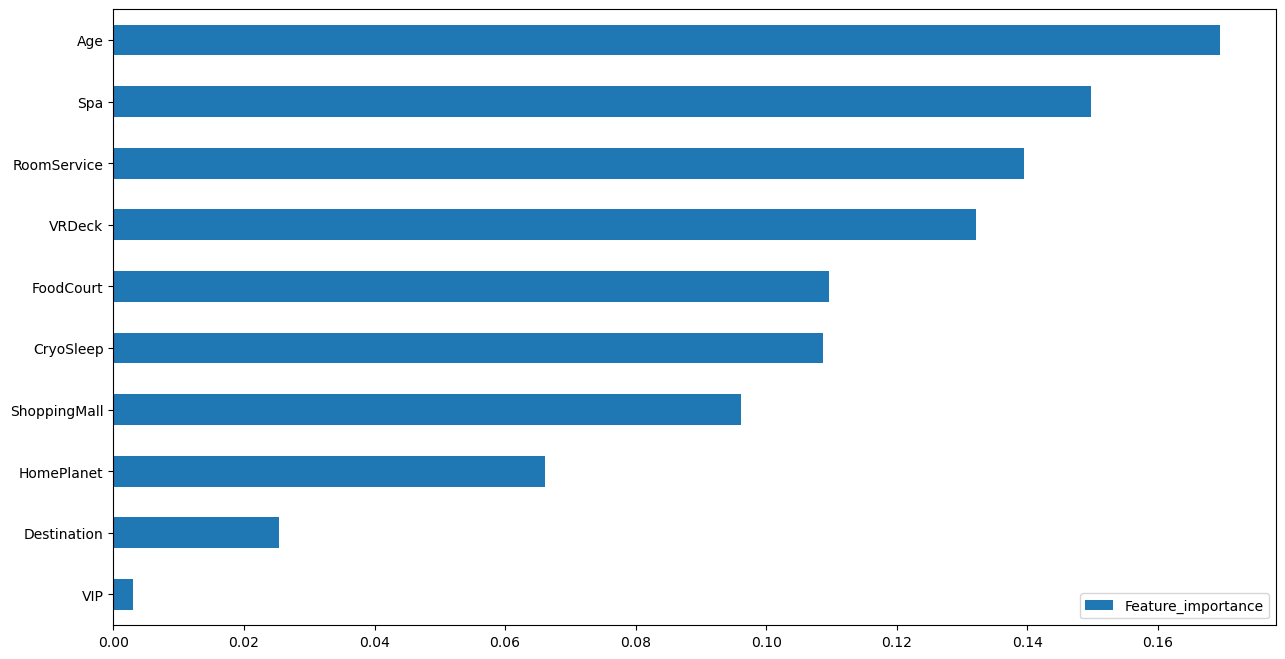

In [85]:
fimp.sort_values(by = 'Feature_importance',ascending = True).plot(kind='barh')
plt.show()

In [86]:
## Selecting first six features based on above graph

In [87]:
xtrain_imp = xtrain_sc[['Age',
'RoomService',
'Spa',
'VRDeck',
'CryoSleep',
'FoodCourt']]
xtrain_imp

,Age,RoomService,Spa,VRDeck,CryoSleep,FoodCourt
4825,-0.755593,-0.331768,-0.274666,-0.269198,1,-0.292372
6702,0.773665,-0.331768,-0.274666,0.005136,1,-0.292372
2093,-0.269011,-0.331768,-0.274666,-0.269198,1,-0.292372
3207,-0.547058,-0.331768,0.096851,0.232937,0,1.540057
175,1.607805,-0.331768,-0.274666,-0.269198,0,-0.292372
...,...,...,...,...,...,...
350,-2.006804,-0.331768,-0.274666,-0.269198,0,-0.292372
79,0.773665,-0.331768,-0.274666,-0.269198,1,-0.292372
8039,-0.755593,-0.331768,-0.274666,-0.269198,1,-0.292372
6936,-0.408034,-0.327329,-0.219926,0.301328,0,-0.292372


In [88]:
xtest_imp = xtest_sc[['Age',
'RoomService',
'Spa',
'VRDeck',
'CryoSleep',
'FoodCourt']]
xtest_imp

,Age,RoomService,Spa,VRDeck,CryoSleep,FoodCourt
6913,-0.129988,-0.331768,-0.158904,2.394460,0,-0.251637
7066,2.024875,1.689500,-0.274666,0.010666,0,-0.126199
8001,-0.755593,-0.331768,-0.274666,-0.269198,1,-0.292372
1200,-1.033640,-0.331768,-0.274666,-0.269198,1,-0.292372
4442,-0.338523,-0.103895,-0.083523,0.138449,0,-0.287846
...,...,...,...,...,...,...
7869,0.217571,-0.331768,1.652916,0.017865,0,-0.283966
6271,0.009036,-0.331768,-0.274666,-0.269198,1,-0.292372
4002,1.885852,0.277868,-0.169672,-0.239502,0,0.025749
4621,-0.408034,-0.040268,-0.268384,-0.269198,0,-0.243231


### 9.Ada Boosting with important features:

In [89]:
ada1 = AdaBoostClassifier(random_state=100)
ada1.fit(xtrain_imp,ytrain)
ada_pred1 = ada1.predict(xtest_imp)
ada_pred1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [90]:
metrices('Ada Boosting classifier with important features',ytest,ada_pred1)

Name of the model : Ada Boosting classifier with important features
Precision score : 0.7484008528784648
Recall score : 0.8343898573692552
Accuracy : 0.7841257668711656
F1-Score : 0.7841257668711656
Weighted F1-Score 0.7838448866707838
Classification report 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      1346
           1       0.75      0.83      0.79      1262

    accuracy                           0.78      2608
   macro avg       0.79      0.79      0.78      2608
weighted avg       0.79      0.78      0.78      2608

Cohen Kappa Score : 0.5693471504779022


In [91]:
a9 = round(accuracy_score(ytest,ada_pred1)*100,2)
a9

78.41

### 10.XG Boosting with important features:

In [92]:
xg1 = XGBClassifier(random_state=100)
xg1.fit(xtrain_imp,ytrain)
xg_pred1 = xg1.predict(xtest_imp)
xg_pred1

array([0, 0, 1, ..., 0, 0, 1])

In [93]:
metrices('XG Boosting classifier with important features',ytest,xg_pred1)

Name of the model : XG Boosting classifier with important features
Precision score : 0.7351724137931035
Recall score : 0.8446909667194928
Accuracy : 0.7776073619631901
F1-Score : 0.7776073619631901
Weighted F1-Score 0.7769670559426615
Classification report 
               precision    recall  f1-score   support

           0       0.83      0.71      0.77      1346
           1       0.74      0.84      0.79      1262

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608

Cohen Kappa Score : 0.5568129346493623


In [94]:
a10 = round(accuracy_score(ytest,xg_pred1),3)*100
a10

77.8

## Summary:

In [95]:
data = {'Models':['Logistic Regression','Decision tree','Random Forest',
                               'Naive - Bayes Classifier','Support Vector Machine(classifier)',
                             'Gradiant Boosting','XG Boosting','Ada Boosting',
                'Ada Boosting with impotant features','XG Boosting with important features'],
       'Accuracy':[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]}

In [96]:
result = pd.DataFrame(data).sort_values(by = ['Accuracy'],ascending=False)

In [97]:
result

,Models,Accuracy
0,Logistic Regression,78.80
5,Gradiant Boosting,78.80
4,Support Vector Machine(classifier),78.60
8,Ada Boosting with impotant features,78.41
6,XG Boosting,78.40
7,Ada Boosting,78.30
2,Random Forest,77.80
9,XG Boosting with important features,77.80
1,Decision tree,74.30
3,Naive - Bayes Classifier,68.60


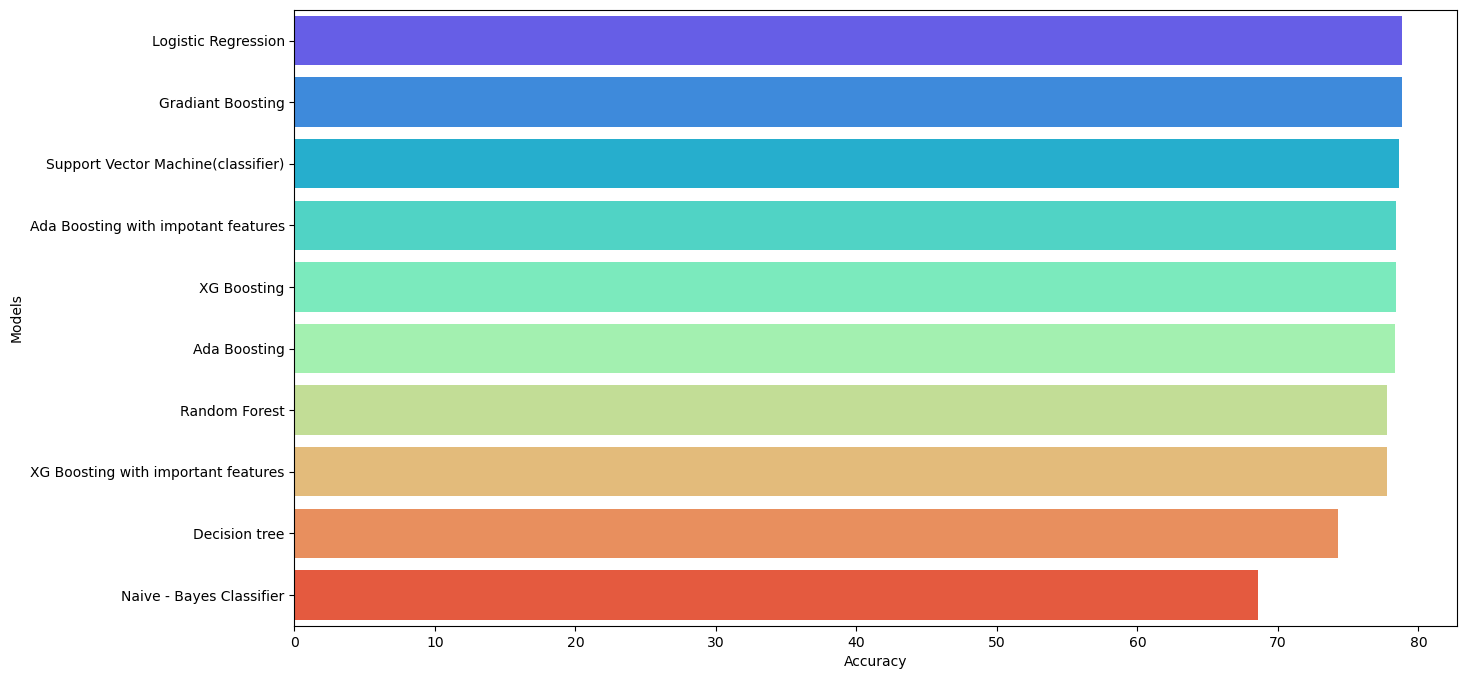

In [98]:
sns.barplot(x=result['Accuracy'],y=result['Models'],palette='rainbow')
plt.show()

#### I consider Gradient Boosting model as good model and i use it to predit the test data

## Test Data:

In [99]:
test = pd.read_csv('test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [101]:
test.shape

(4277, 13)

In [102]:
test.columns.to_list()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [103]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


### Cleaning the data:

In [104]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [105]:
#filling null values with mean in numerical columns

test['Age']=test['Age'].fillna(test['Age'].mean())
test['RoomService']=test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt']=test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall']=test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa']=test['Spa'].fillna(test['Spa'].mean())
test['VRDeck']=test['VRDeck'].fillna(test['VRDeck'].mean())

In [106]:
#filling null values with mode in categorical columns

test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode()[0])

In [107]:
test.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [108]:
#droping unwanted columns
test1=test.drop(['Name','Cabin'],axis=1)
test1

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0


In [109]:
test1

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0


### Encoding:

In [110]:
#converting categorical feature into numerical feature
test1.HomePlanet=test1.HomePlanet.map({'Europa':0,'Earth':1,'Mars':2})
test1["CryoSleep"].replace(False,0,inplace=True)
test1["CryoSleep"].replace(True,1,inplace=True)
test1["VIP"].replace(False,0,inplace=True)
test1["VIP"].replace(True,1,inplace=True)
test1.Destination=test1.Destination.map({'TRAPPIST-1e':0,'PSO J318.5-22':1,'55 Cancri e':2})
test1

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,1,1,0,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,0,1,2,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,0,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,0,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,0,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,0,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,2,1,2,28.658146,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0


In [111]:
test_df = test1.copy()
test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,1,1,0,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,0,1,2,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,0,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,0,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,0,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,0,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,2,1,2,28.658146,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,0,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0


In [112]:
test_df.drop('PassengerId',axis=1,inplace=True)

### Predicting Target column  using Gradiant Boosting Model:

In [113]:
final = gb.predict(test_df)
final_pred = pd.DataFrame(final,columns=['Transported'])
final_pred

,Transported
0,0
1,0
2,1
3,0
4,0
...,...
4272,0
4273,0
4274,1
4275,0


## Final Prediction:

In [114]:
final_df = pd.concat([test1['PassengerId'],final_pred],axis=1)
final_df

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0
...,...,...
4272,9266_02,0
4273,9269_01,0
4274,9271_01,1
4275,9273_01,0


In [115]:
final_df.shape

(4277, 2)

In [116]:
final_df.to_csv('spaceship_titanic.csv',index=False)

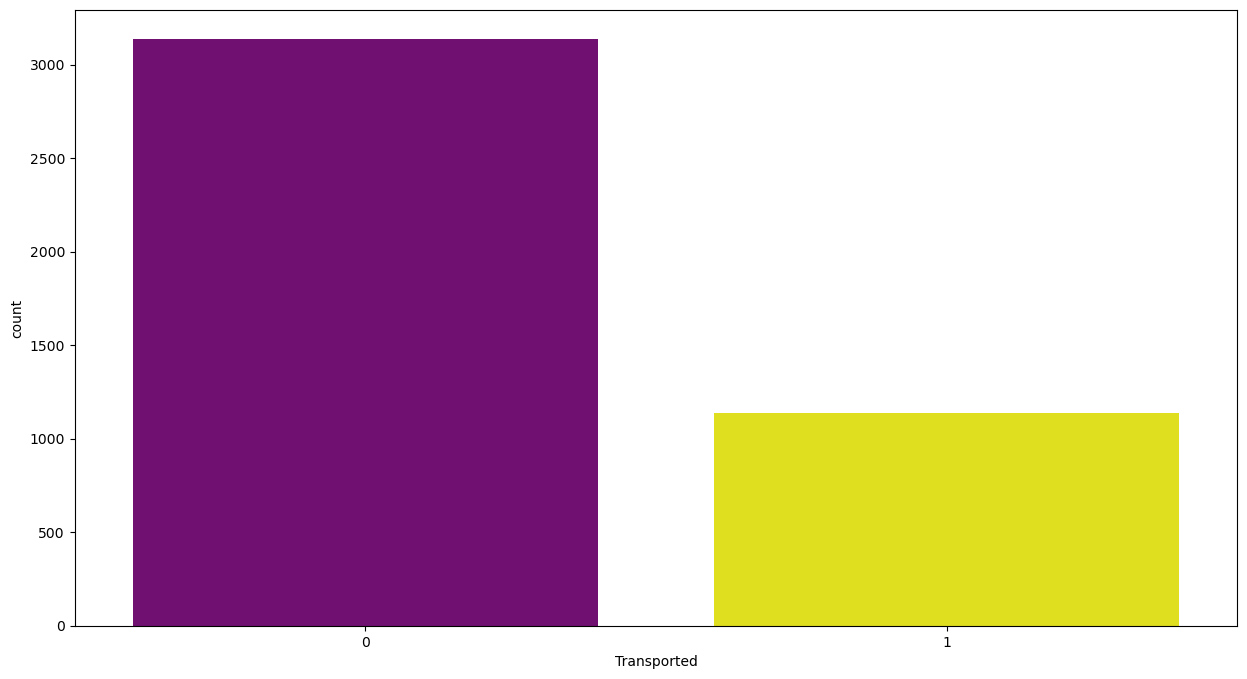

In [117]:
#Target column analysis after prediction:
sns.countplot(final_df.Transported,palette=['purple','yellow'])
plt.show()